# Dados

In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import cv2
import shutil
from module import data_read, setup
from torch.utils.data import ConcatDataset
from module.LightningModule import ClassificationModule
from module.setup import *
from module.data_read import *
from module.plot import imshow
from module import data_read
import lightning as L

torch.manual_seed(random_state)
torch.set_float32_matmul_precision('high')

DDR_DIR = Path.cwd() / 'DDR-dataset/DR_grading'
IDRID_DIR = Path.cwd() / 'IDRID-Classificacao'

# Lighting Module

## Binary

In [2]:
# Leitura IDRID
train_idrid_dataset = IDRIDDataset(IDRID_DIR/'1. Original Images/a. Training Set',
                                   IDRID_DIR/'2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv',
                                   data_transforms['test'],
                                   convert_to_binary=True,
                                   dataset_name='idrid')
test_idrid_dataset = IDRIDDataset(IDRID_DIR/'1. Original Images/b. Testing Set',
                                  IDRID_DIR/'2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv',                   
                                  data_transforms['test'],
                                  convert_to_binary=True,
                                  dataset_name='idrid')
idrid_dataset = ConcatDataset([train_idrid_dataset, test_idrid_dataset])

#### VGG16 instanciation

In [3]:
from torchvision import models
from torch import nn

# Transfer learning (fine tuning):
# Instanciação VGG16_BN
weights = models.VGG16_BN_Weights.DEFAULT # melhores pesos até o momento
vgg16 = models.vgg16_bn(weights=weights)
# transformações específicas da rede
vgg16_preprocess = weights.transforms()
# modificando a camada de classificação
num_ftrs = vgg16.classifier[-1].in_features
vgg16.classifier[-1] = nn.Linear(num_ftrs, num_classes)

In [4]:
vgg16_preprocess

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [5]:
vgg16.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=2, bias=True)
)

#### Execution

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: checkpoints_kfold/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | VGG              | 134 M 
1 | loss_module   | CrossEntropyLoss | 0     
2 | metrics_train | MetricCollection | 0     
3 | metrics_test  | MetricCollection | 0     
---------------------------------------------------
134 M     Trainable params
0         Non-trainable params
134 M     Total params
537.109   Total estimated model params size (MB)


FOLD 0
--------------------------------


Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=20` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      ddr-test-acc          0.4980063736438751
     ddr-test-auroc         0.7396080493927002
       ddr-test-f1          0.6648921966552734
   ddr-test-precision       0.4980063736438751
     ddr-test-recall                1.0
  ddr-test-specificity              0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     idrid-test-acc         0.6744186282157898
    idrid-test-auroc        0.9446582794189453
      idrid-test-f1         0.8055555820465088
  idrid-test-precision      0.6744186282157898
    idrid-test-recall               1.0
 idrid-test-specificity             0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | VGG              | 134 M 
1 | loss_module   | CrossEntropyLoss | 0     
2 | metrics_train | MetricCollection | 0     
3 | metrics_test  | MetricCollection | 0     
---------------------------------------------------
134 M     Trainable params
0         Non-trainable params
134 M     Total params
537.109   Total estimated model params size (MB)


FOLD 1
--------------------------------


Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=20` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      ddr-test-acc          0.49799519777297974
     ddr-test-auroc         0.6798040866851807
       ddr-test-f1           0.662715494632721
   ddr-test-precision       0.4965684413909912
     ddr-test-recall        0.9959514141082764
  ddr-test-specificity     0.009531374089419842
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     idrid-test-acc         0.6744186282157898
    idrid-test-auroc        0.8885040283203125
      idrid-test-f1         0.8055555820465088
  idrid-test-precision      0.6744186282157898
    idrid-test-recall               1.0
 idrid-test-specificity             0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | VGG              | 134 M 
1 | loss_module   | CrossEntropyLoss | 0     
2 | metrics_train | MetricCollection | 0     
3 | metrics_test  | MetricCollection | 0     
---------------------------------------------------
134 M     Trainable params
0         Non-trainable params
134 M     Total params
537.109   Total estimated model params size (MB)


FOLD 2
--------------------------------


Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=20` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      ddr-test-acc          0.5154272317886353
     ddr-test-auroc          0.673547089099884
       ddr-test-f1          0.6802401542663574
   ddr-test-precision       0.5154272317886353
     ddr-test-recall                1.0
  ddr-test-specificity              0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     idrid-test-acc         0.6744186282157898
    idrid-test-auroc        0.9538434147834778
      idrid-test-f1         0.8055555820465088
  idrid-test-precision      0.6744186282157898
    idrid-test-recall               1.0
 idrid-test-specificity             0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | VGG              | 134 M 
1 | loss_module   | CrossEntropyLoss | 0     
2 | metrics_train | MetricCollection | 0     
3 | metrics_test  | MetricCollection | 0     
---------------------------------------------------
134 M     Trainable params
0         Non-trainable params
134 M     Total params
537.109   Total estimated model params size (MB)


FOLD 3
--------------------------------


Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=20` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      ddr-test-acc          0.49679744243621826
     ddr-test-auroc          0.783629298210144
       ddr-test-f1          0.6636339426040649
   ddr-test-precision       0.49659591913223267
     ddr-test-recall                1.0
  ddr-test-specificity     0.0007949125720188022
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     idrid-test-acc         0.6744186282157898
    idrid-test-auroc         0.959368109703064
      idrid-test-f1         0.8055555820465088
  idrid-test-precision      0.6744186282157898
    idrid-test-recall               1.0
 idrid-test-specificity             0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | VGG              | 134 M 
1 | loss_module   | CrossEntropyLoss | 0     
2 | metrics_train | MetricCollection | 0     
3 | metrics_test  | MetricCollection | 0     
---------------------------------------------------
134 M     Trainable params
0         Non-trainable params
134 M     Total params
537.109   Total estimated model params size (MB)


FOLD 4
--------------------------------


Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=20` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      ddr-test-acc          0.49278268218040466
     ddr-test-auroc         0.6250388622283936
       ddr-test-f1          0.6602202653884888
   ddr-test-precision       0.49278268218040466
     ddr-test-recall                1.0
  ddr-test-specificity              0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |                                                                                                    …

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     idrid-test-acc         0.6744186282157898
    idrid-test-auroc        0.9540914297103882
      idrid-test-f1         0.8055555820465088
  idrid-test-precision      0.6744186282157898
    idrid-test-recall               1.0
 idrid-test-specificity             0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


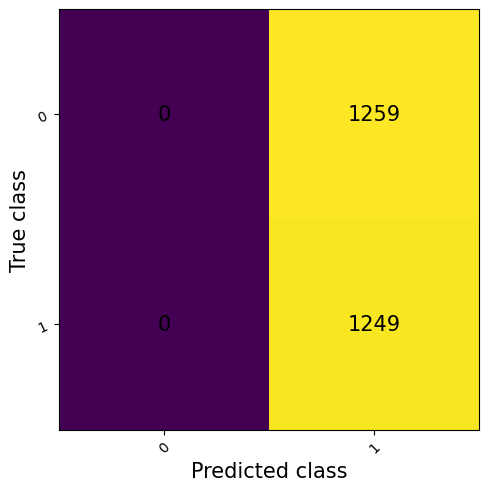

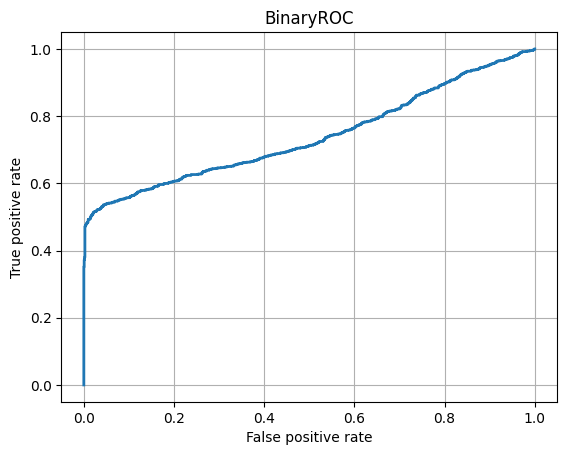

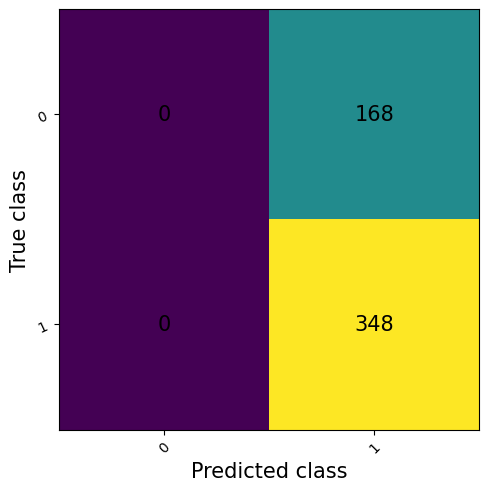

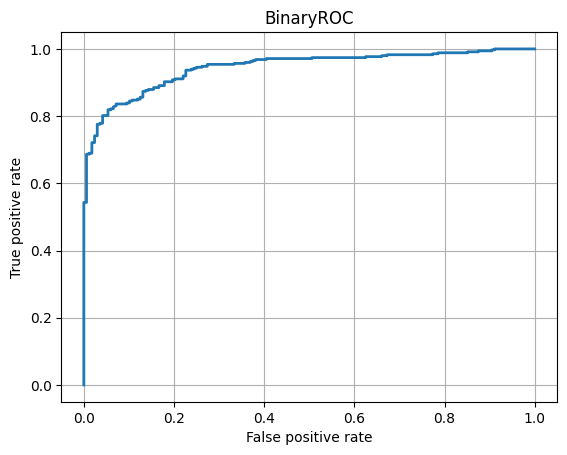

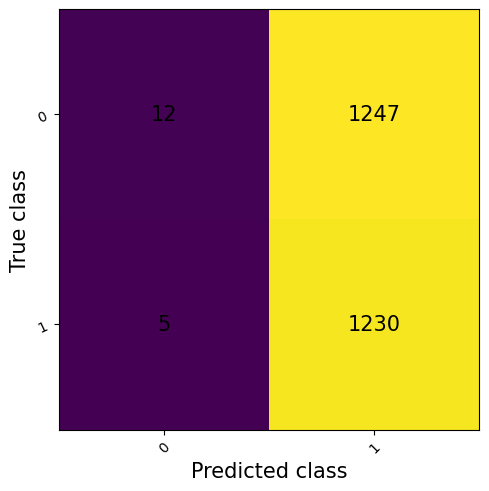

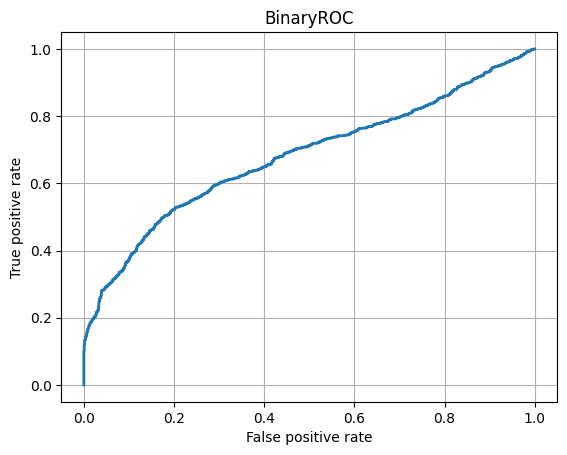

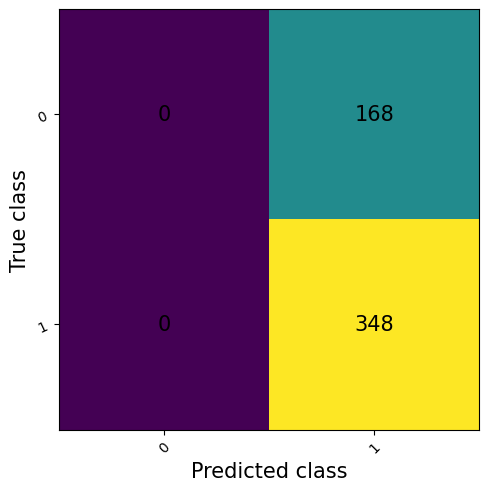

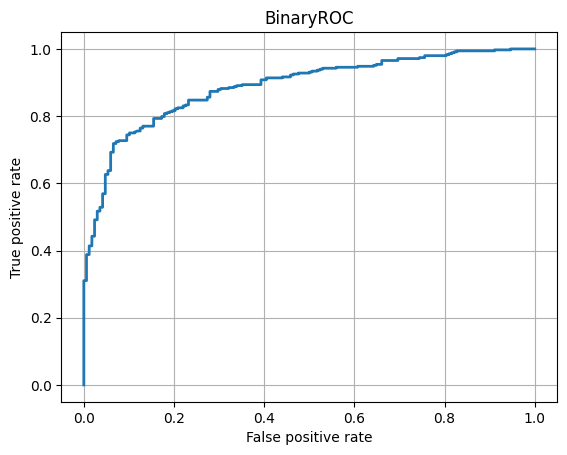

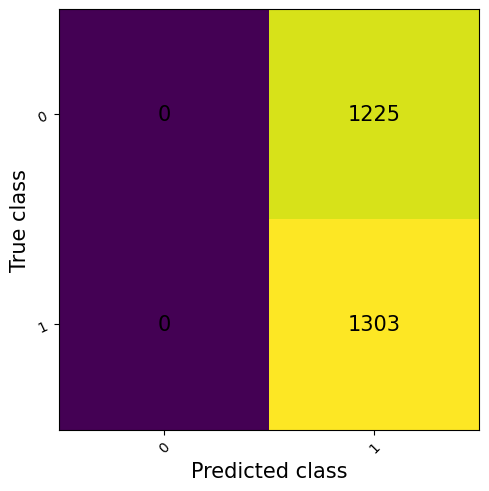

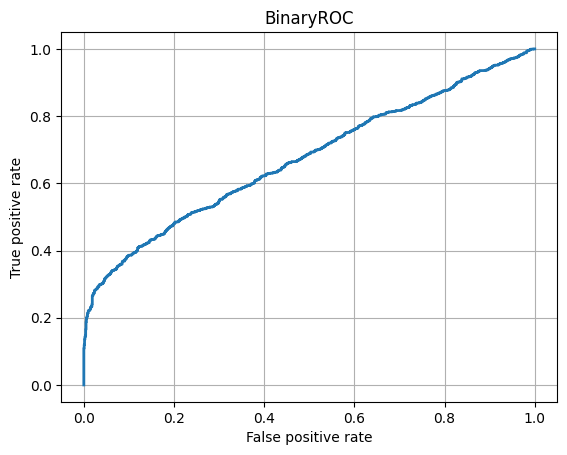

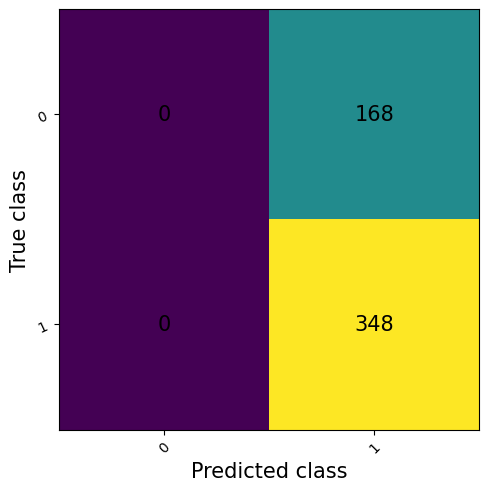

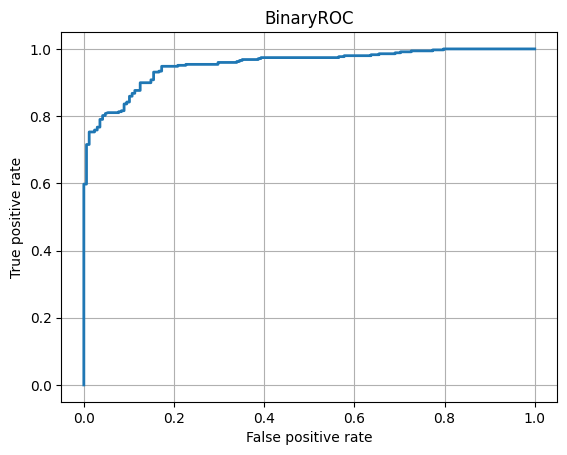

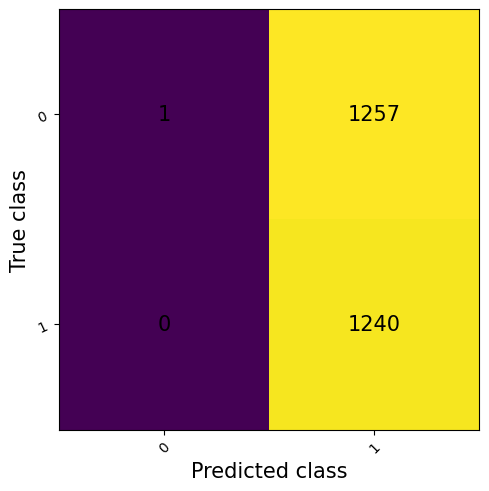

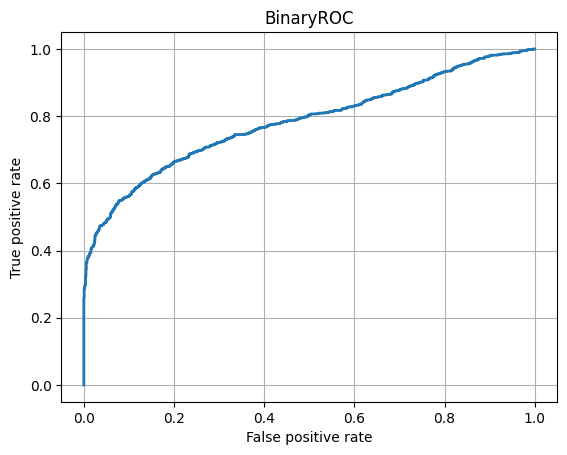

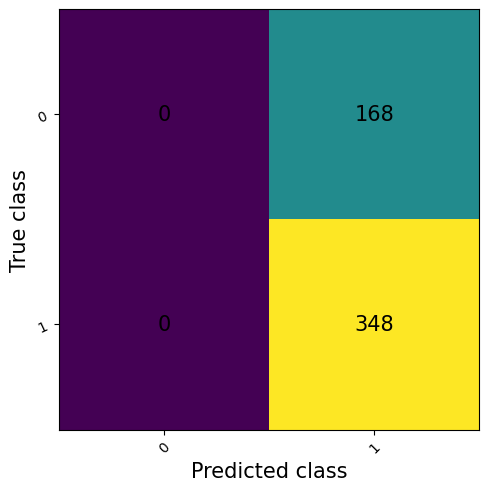

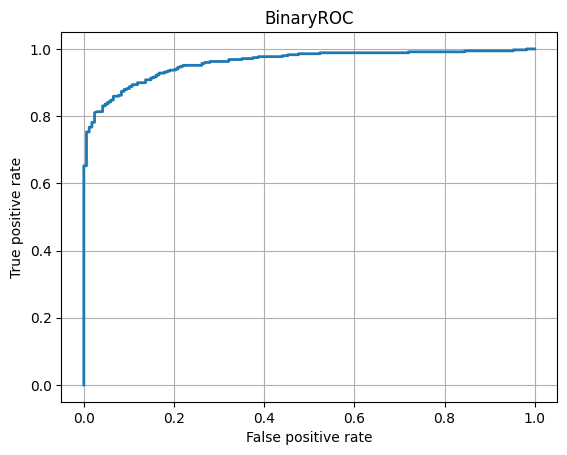

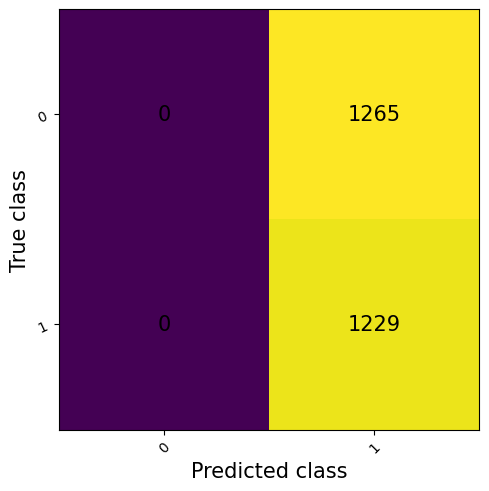

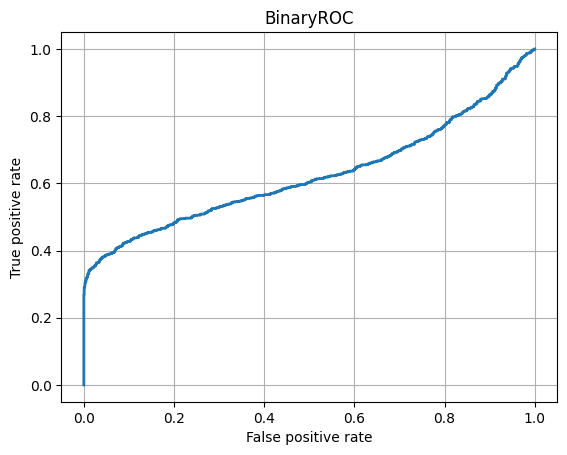

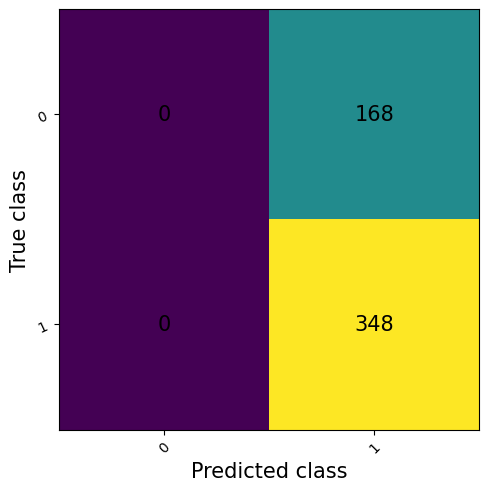

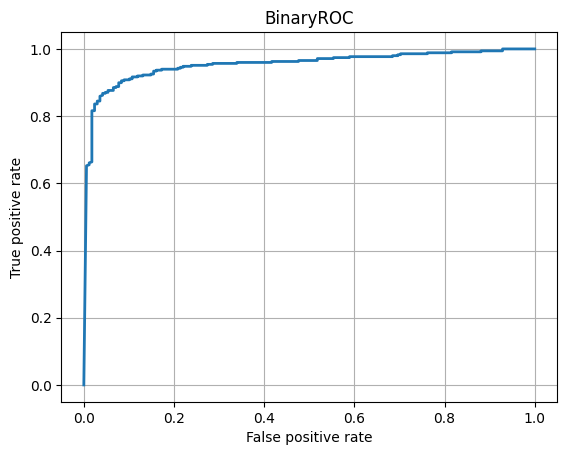

In [6]:
from lightning.pytorch.loggers import TensorBoardLogger
from sklearn.model_selection import KFold


anno_train_ddr = pd.read_csv(DDR_DIR/'train.txt', header=None, sep=' ')
anno_train_ddr[0] = 'train/'+anno_train_ddr[0]
anno_valid_ddr = pd.read_csv(DDR_DIR/'valid.txt', header=None, sep=' ')
anno_valid_ddr[0] = 'valid/'+anno_valid_ddr[0]
anno_test_ddr = pd.read_csv(DDR_DIR/'test.txt', header=None, sep=' ')
anno_test_ddr[0] = 'test/'+anno_test_ddr[0]

# Todas as anotações do DDR
anno_ddr = pd.concat([anno_train_ddr, anno_valid_ddr, anno_test_ddr], ignore_index=True)
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=random_state)

for fold, (train_ids, test_ids) in enumerate(kfold.split(anno_ddr)):
    print(f'FOLD {fold}')
    print('--------------------------------')
    
    # Divide os dados com base nos atuais indices do K-fold
    train_dataset = DDRDatasetKFold(DDR_DIR, anno_ddr.iloc[train_ids], data_transforms['train'], convert_to_binary=True, dataset_name='ddr')
    test_dataset = DDRDatasetKFold(DDR_DIR, anno_ddr.iloc[test_ids], data_transforms['test'], convert_to_binary=True, dataset_name='ddr')


    # Definição dos dataloaders
    trainloader = torch.utils.data.DataLoader(
                      train_dataset,
                      batch_size=batch_size,
                      shuffle=True,
                      num_workers=8) # MUDAR
    testloader = torch.utils.data.DataLoader(
                      test_dataset,
                      batch_size=batch_size,
                      shuffle=False,
                      num_workers=8)
    idridloader = torch.utils.data.DataLoader(
                      idrid_dataset,
                      batch_size=batch_size,
                      num_workers=8)



    # DEBUG:
    # trainer = L.Trainer(fast_dev_run=2) # a execução do trainer se limitará a fast_dev_run batchs
    # trainer = L.Trainer(limit_train_batches=30, max_epochs=1) # usar apenas 30% dos dados de cada lote de treino
    trainer = L.Trainer(default_root_dir='checkpoints_kfold/', accelerator='gpu', max_epochs=num_epochs)


    
    # treino
    vgg16_model = ClassificationModule(vgg16, loss_function, torch.optim.Adam, fold)
    trainer.fit(model=vgg16_model, train_dataloaders=trainloader)
    
    # teste 
    trainer.test(model=vgg16_model, dataloaders=testloader) # test na fold de test
    trainer.test(model=vgg16_model, dataloaders=idridloader) # test no idrid

# Multiclass and binary metrics test

In [7]:
import torch
from torchmetrics.classification import BinaryAccuracy
labels = torch.tensor([1, 0, 1, 0, 1])
preds = torch.tensor([[0,1], [1, 0], [0.4, 0.6], [0.1, 0.9], [0.8, 0.2]])

loss = nn.CrossEntropyLoss()
loss(preds, labels)

tensor(0.6867)

In [8]:
# import lightning as L
# import torch
# from torch import nn, optim
# import numpy as np
# import matplotlib.pyplot as plt
# from torchmetrics import MetricCollection 
# from torchmetrics.classification import Accuracy, Recall, Precision, F1Score, Specificity, AUROC, ROC


# # labels = torch.from_numpy(np.array([0,1,2,3,4]))
# # preds_prob = torch.from_numpy(np.array([[0.1, 0.6, 0.2, 0.1, 0], [0.1, 0, 0.2, 0.7, 0], [0, 0, 0.2, 0.8, 0], \
# # #                                    [0.1, 0.2, 0.2, 0.5, 0.0], [0.1, 0, 0.2, 0.5, 0.2]]))
# # preds = preds_prob.argmax(dim=1)
# # print(preds)
# labels = torch.from_numpy(np.array([0, 1, 0, 1, 0, 0]))
# preds = torch.from_numpy(np.array([0, 1, 1, 0, 1, 1]).astype(np.float32))

# disp_cm = ConfusionMatrixDisplay.from_predictions(labels, preds,
#                                   display_labels=['No DR', 'DR'] if setup.num_classes==2 else [],
#                                   cmap='Blues')
# num_classes = 2

# binary_metrics = MetricCollection({'acc': Accuracy('binary'),
#                                    'recall': Recall('binary'),
#                                    'precision': Precision('binary'),
#                                    'f1': F1Score('binary'),
#                                    'specificity': Specificity('binary'),
#                                    'auroc': AUROC('binary'),
#                                    'roc_curve': ROC('binary'),}
#                                   )


# multiclass_metrics = MetricCollection({'acc': Accuracy(task=task, num_classes=num_classes),}
#                             'acc_per_class': Accuracy(task=task, num_classes=num_classes, average=None),
#                             'recall': Recall(task=task, num_classes=num_classes),
#                             'recall_per_class': Recall(task=task, num_classes=num_classes, average=None),
#                             'precision': Precision(task=task, num_classes=num_classes),
#                             'precision_per_class': Precision(task=task, num_classes=num_classes, average=None),
#                             'f1': F1Score(task=task, num_classes=num_classes),
#                             'f1_per_class': F1Score(task=task, num_classes=num_classes, average=None),
#                             'specificity': Specificity(task=task, num_classes=num_classes),
#                             'specificity_per_class': Specificity(task=task, num_classes=num_classes, average=None),
#                             'auroc': AUROC(task=task, num_classes=num_classes),
#                             'auroc_per_class': AUROC(task=task, num_classes=num_classes, average=None),
#                             'roc_curve': ROC(task=task, num_classes=num_classes),}
#                           )


# dict_m = binary_metrics(preds, labels)

In [9]:
# import pandas as pd

# new_d = {key: value.numpy() for key, value in dict_m.items() if not '_' in key}
# df = pd.DataFrame([new_d], index=['Fold 1'])
# df

In [10]:
# import pandas as pd

# new_d = {key: value.numpy() for key, value in dict_m.items() if '_' in key and key !='roc_curve'}
# df = pd.DataFrame(new_d)
# df

In [11]:
# dict_m

In [12]:
# metrics['roc_curve'].plot(dict_m['roc_curve'])

In [13]:
# for i,j in dict_m.items():
#     print(i, j)
    